# Trabalho 1

## Regressão Logística

### Ajuste da taxa de aprendizado e número de iterações

A primeira etada é ajustar a taxa de aprendizado e o número de iterações. Após alterar os outros hyperparameters (fator de regularização e grau dos atributos polinimiais) será necessário realizar o ajuste fino, mas será algum valor próximo ao encontrado nesta etapa.

** imports necessários: **

In [1]:
from regressao_logistica_regularizado import RegularizedLogisticRegression
from experimentos import Dataset as DATASET
from experimentos import ModelSelection
from experimentos import Plot
from dataset import Dataset
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

** varia alpha e número de iterações e plota os gráficos: **

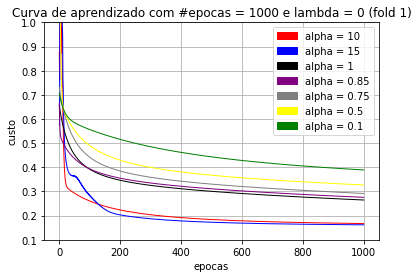

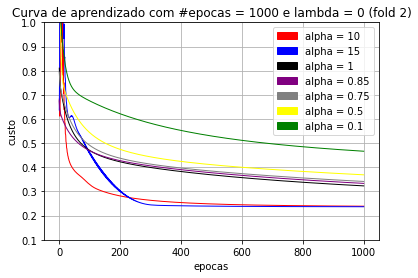

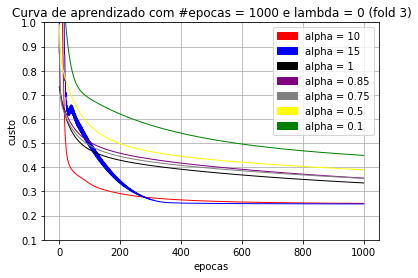

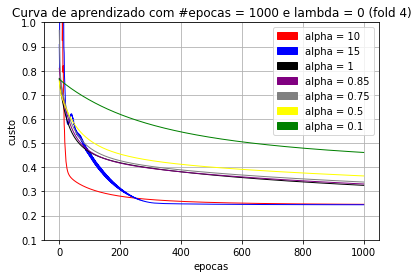

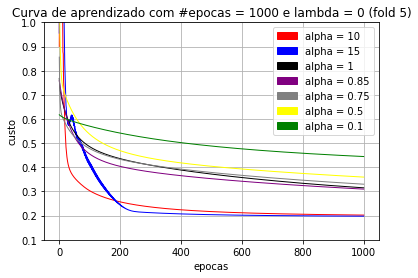

alphas =  [10, 15, 1, 0.85, 0.75, 0.5, 0.1]
erro medio no treino  [ 0.08125  0.08125  0.1275   0.1325   0.1425   0.1525   0.1625 ]
desvio padrao no treino  [ 0.01425219  0.01425219  0.01403122  0.01391941  0.00728869  0.00847791
  0.01629801]
erro medio na validacao  [ 0.085  0.085  0.125  0.13   0.14   0.16   0.175]
desvio padrao na validacao  [ 0.04898979  0.04898979  0.05244044  0.0484768   0.05612486  0.07
  0.05700877]


In [2]:
RLR = RegularizedLogisticRegression()
MS = ModelSelection()
DTS = DATASET()
PLT = Plot()

# carrega dataset
X,Y = RLR.load_dataset('datasets/mnist.csv', header=True)

# normaliza
X_ =  DTS.dataset_scaling(X)
alphas = [10, 15, 1, 0.85, 0.75, 0.5, 0.1]
epochs = [1000]
Lambda = 0
colors = ['red', 'blue', 'black', 'purple', 'gray', 'yellow', 'green']
fold = 1
errors = {}
test_errors = {}

for train,test in MS.k_fold(X_, k=5, shuffle=True):
    errors[str(fold)] = []
    test_errors[str(fold)] = []
    for e in epochs:
        legends = []
        for i,a in enumerate(alphas):
            # ajusta o modelo
            RLR.fit(X_[train], Y[train], epochs=e, learning_rate=a, Lambda=Lambda, print_results=False)
            
            # calcula o erro no treino
            errors[str(fold)].append(RLR.binary_error(X_[train], Y[train]))
            # calcula o erro no teste
            test_errors[str(fold)].append(RLR.binary_error(X_[test], Y[test]))
            
            plt.plot(range(e+1), RLR.loss, color=colors[i], linewidth=1)
            legends.append(mpatches.Patch(color=colors[i], label='alpha = ' + str(a)))
        title = 'Curva de aprendizado com #epocas = ' + str(e) + ' e lambda = ' + str(Lambda) + ' (fold ' + str(fold) + ')'
        plt.ylim([0.1, 1])
        plt.xlabel('epocas')
        plt.ylabel('custo')
        plt.legend(handles=legends[:], loc='upper right')
        plt.title(title)
        plt.grid(True)

        plt.show()
        #plt.savefig('fold' + str(fold) + '.eps')
        fold += 1
        
error = []
for i,j in errors.iteritems():
    error.append(j)
    
test_error = []
for i,j in test_errors.iteritems():
    test_error.append(j)

print "alphas = ", alphas

# cada posição da lista é um alpha na mesma ordem que no gráfico [10, 15 ...]
print "erro medio no treino ", np.asarray(error).mean(axis=0)
print "desvio padrao no treino ", np.asarray(error).std(axis=0)
print "erro medio na validacao ", np.asarray(test_error).mean(axis=0)
print "desvio padrao na validacao ", np.asarray(test_error).std(axis=0)